# Info Dataset

### Sumber

https://www.kaggle.com/code/sahilprajapati143/credit-card-fraud-detection

### Penjelasan terkait dataset

Penting bagi perusahaan kartu kredit untuk mengenali transaksi kartu kredit yang curang agar pelanggan tidak dikenakan biaya untuk barang yang tidak mereka beli. Satu-satunya fitur yang tidak diubah dengan PCA adalah ‘Time’ dan ‘Amount’. Fitur ‘Time’ berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur ‘Amount’ adalah jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran yang sensitif terhadap biaya tergantung pada contoh. Untuk mengidentifikasi dataset termasuk penipuan atau tidak, terdapat kolom 'Class' yang mencakup nilai boolean yaitu 0 dan 1. Nilai 0 mempresentasikan selain penipuan dan 1 mempresentasikan terjadinya penipuan. Namun, yang menjadi masalah adalah terjadinya ketidakseimbangan data yang besar antara class Fraud dengan yang bukan

### Dataset Attributes

- V1 - V28 : Numerical features that are a result of PCA transformation.

- Time : Seconds elapsed between each transaction and the 1st transaction.

- Amount : Transaction amount.

- Class : Fraud or otherwise (1 or 0)

# Import Module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

### Data Overview

In [3]:
dataFraud = pd.read_csv('creditcard.csv')

In [4]:
dataFraud.shape

(284807, 31)

In [5]:
dataFraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
dataFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataFraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
dataFraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Cek Missing Values

In [9]:
dataFraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#Mengatasi Missing Values
dataFraud = dataFraud.dropna()
dataFraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Cek Duplicated Data

In [11]:
print(f'Jumlah data duplikat (sebelum): {dataFraud.duplicated().sum()}')

Jumlah data duplikat (sebelum): 1081


In [12]:
dataFraud = dataFraud.drop_duplicates().reset_index(drop=True)
print(f'Jumlah data duplikat (sesudah): {dataFraud.duplicated().sum()}')

Jumlah data duplikat (sesudah): 0


# Data Pre Processing

### Cek Kolom *Class*

In [13]:
dataFraud['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [14]:
print('No Fraud:', round(dataFraud['Class'].value_counts()[0]/len(dataFraud) * 100, 2), '% dari dataset')
print('Fraud:', round(dataFraud['Class'].value_counts()[1]/len(dataFraud) * 100, 2), '% dari dataset')

No Fraud: 99.83 % dari dataset
Fraud: 0.17 % dari dataset


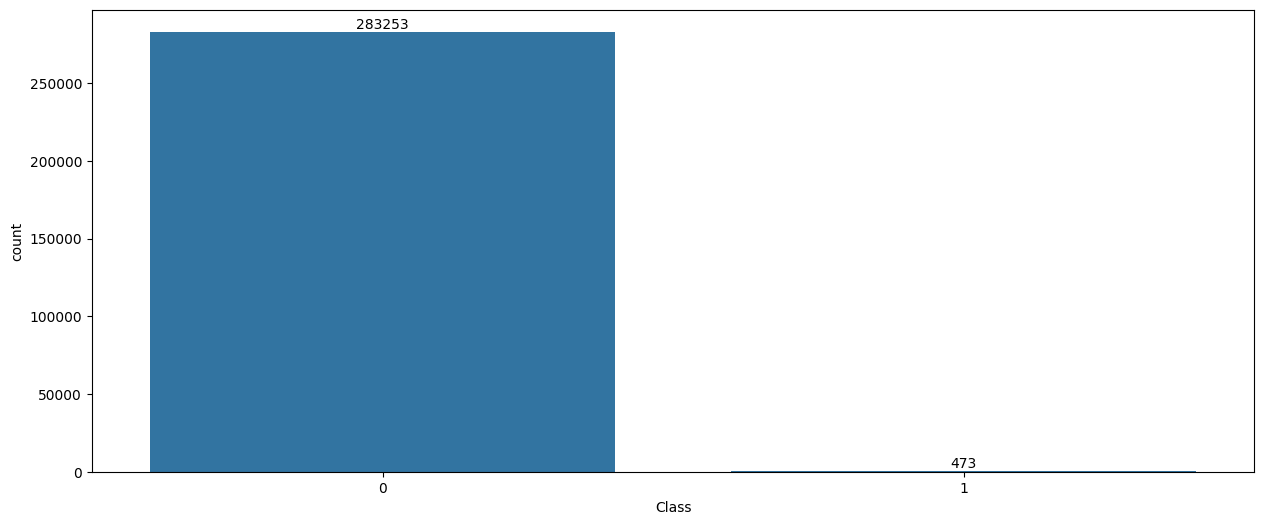

In [19]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Class',data=dataFraud)
for i in ax.containers:
    ax.bar_label(i,)

Terjadi imbalanced data yang sangat parah antara class fraud dengan class bukan Fraud. Class Fraud hanya memiliki data sebesar 0.17% dari dataset sedangkan sebesar 99.83% dari dataset adalah class yang bukan fraud. Hal ini perlu diatasi sebelum analisis lebih lanjut

### Cek Kolom *TIme* dan *Amount* 

Berdasarkan informasi dari dataset, semua kolom kecuali kolom Time dan Amount sudah melalui proses transofrmasi PCA (Principal Component Analysis). Maka dari itu, mari kita investigasi kolom TIme dan Amount

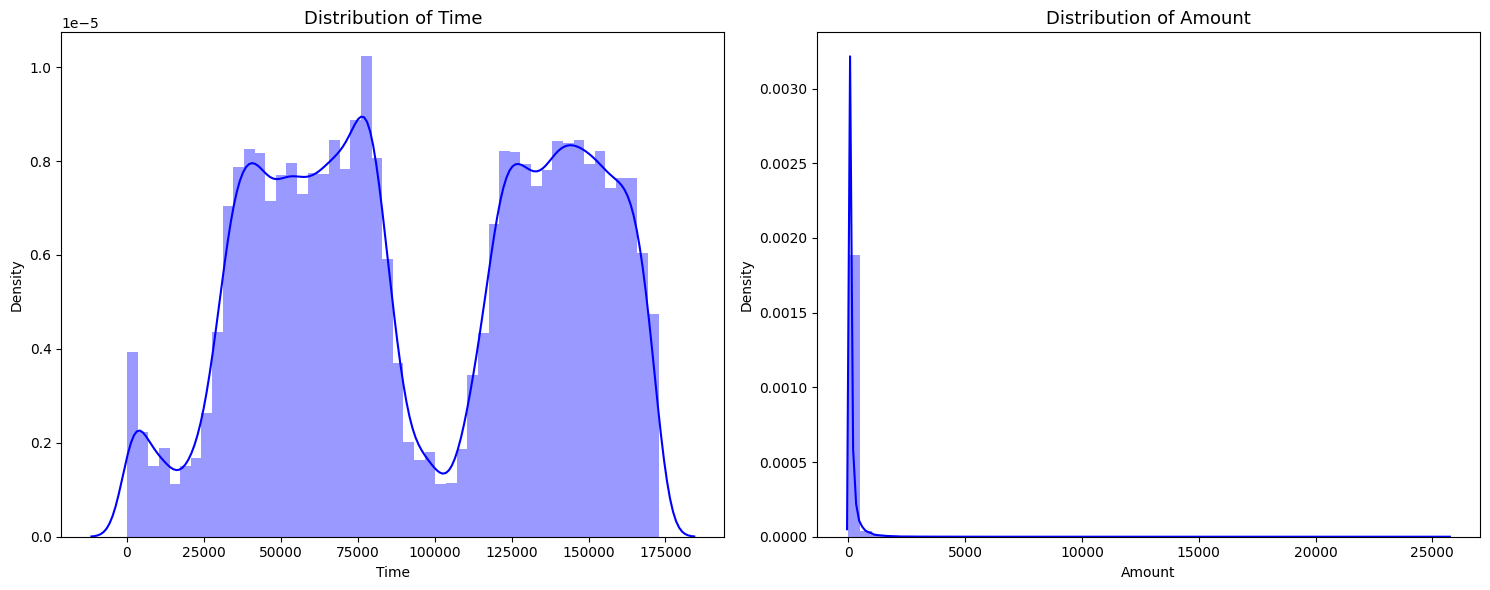

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1 = sns.distplot(dataFraud['Time'], ax=ax1, color='b')
ax2 = sns.distplot(dataFraud['Amount'], ax=ax2, color='b')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

plt.tight_layout()
plt.show()

Melakukan scale untuk kolom TIme dan Amount untuk menormalkan distribusi dan memperkecil rentang antar kuartil 

In [17]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
dataFraud['Amount'] = rs.fit_transform(dataFraud['Amount'].values.reshape(-1,1))
dataFraud['Time'] = rs.fit_transform(dataFraud['Time'].values.reshape(-1,1))

dataFraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


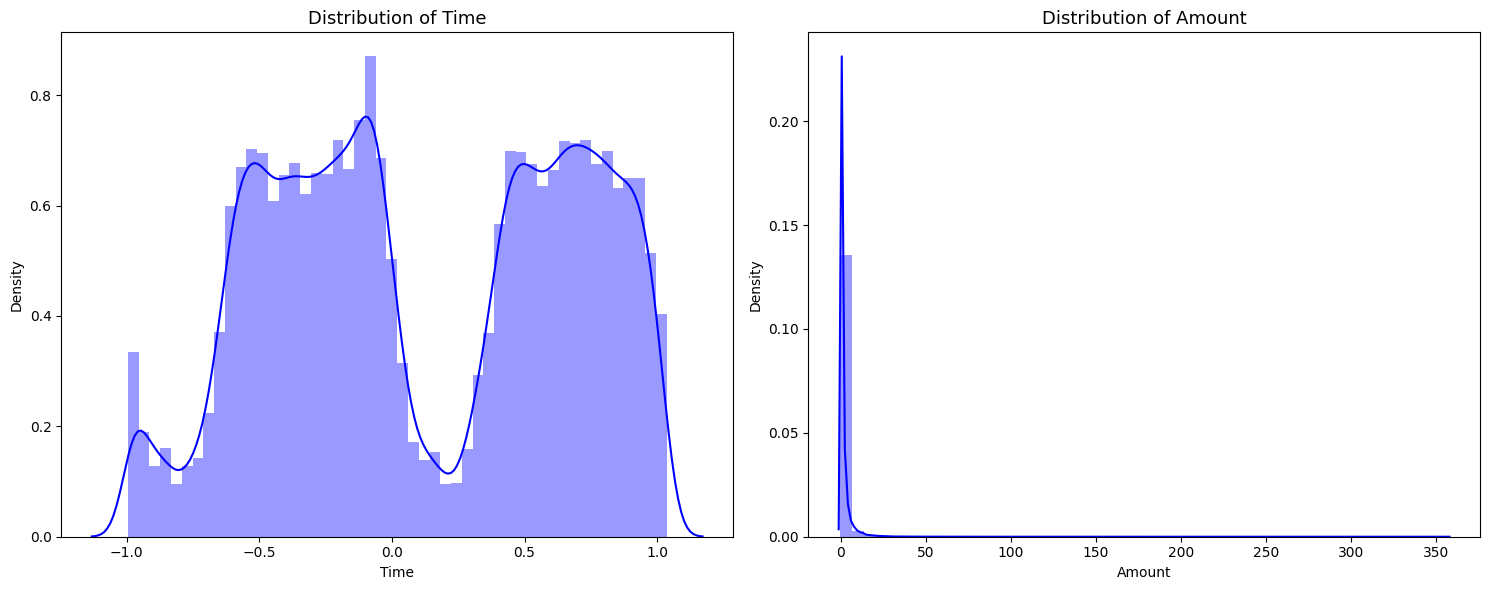

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1 = sns.distplot(dataFraud['Time'], ax=ax1, color='b')
ax2 = sns.distplot(dataFraud['Amount'], ax=ax2, color='b')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

plt.tight_layout()
plt.show()

### Cek Outliers

In [20]:
numeric_columns = (list(dataFraud.loc[:, 'Time':'Amount']))

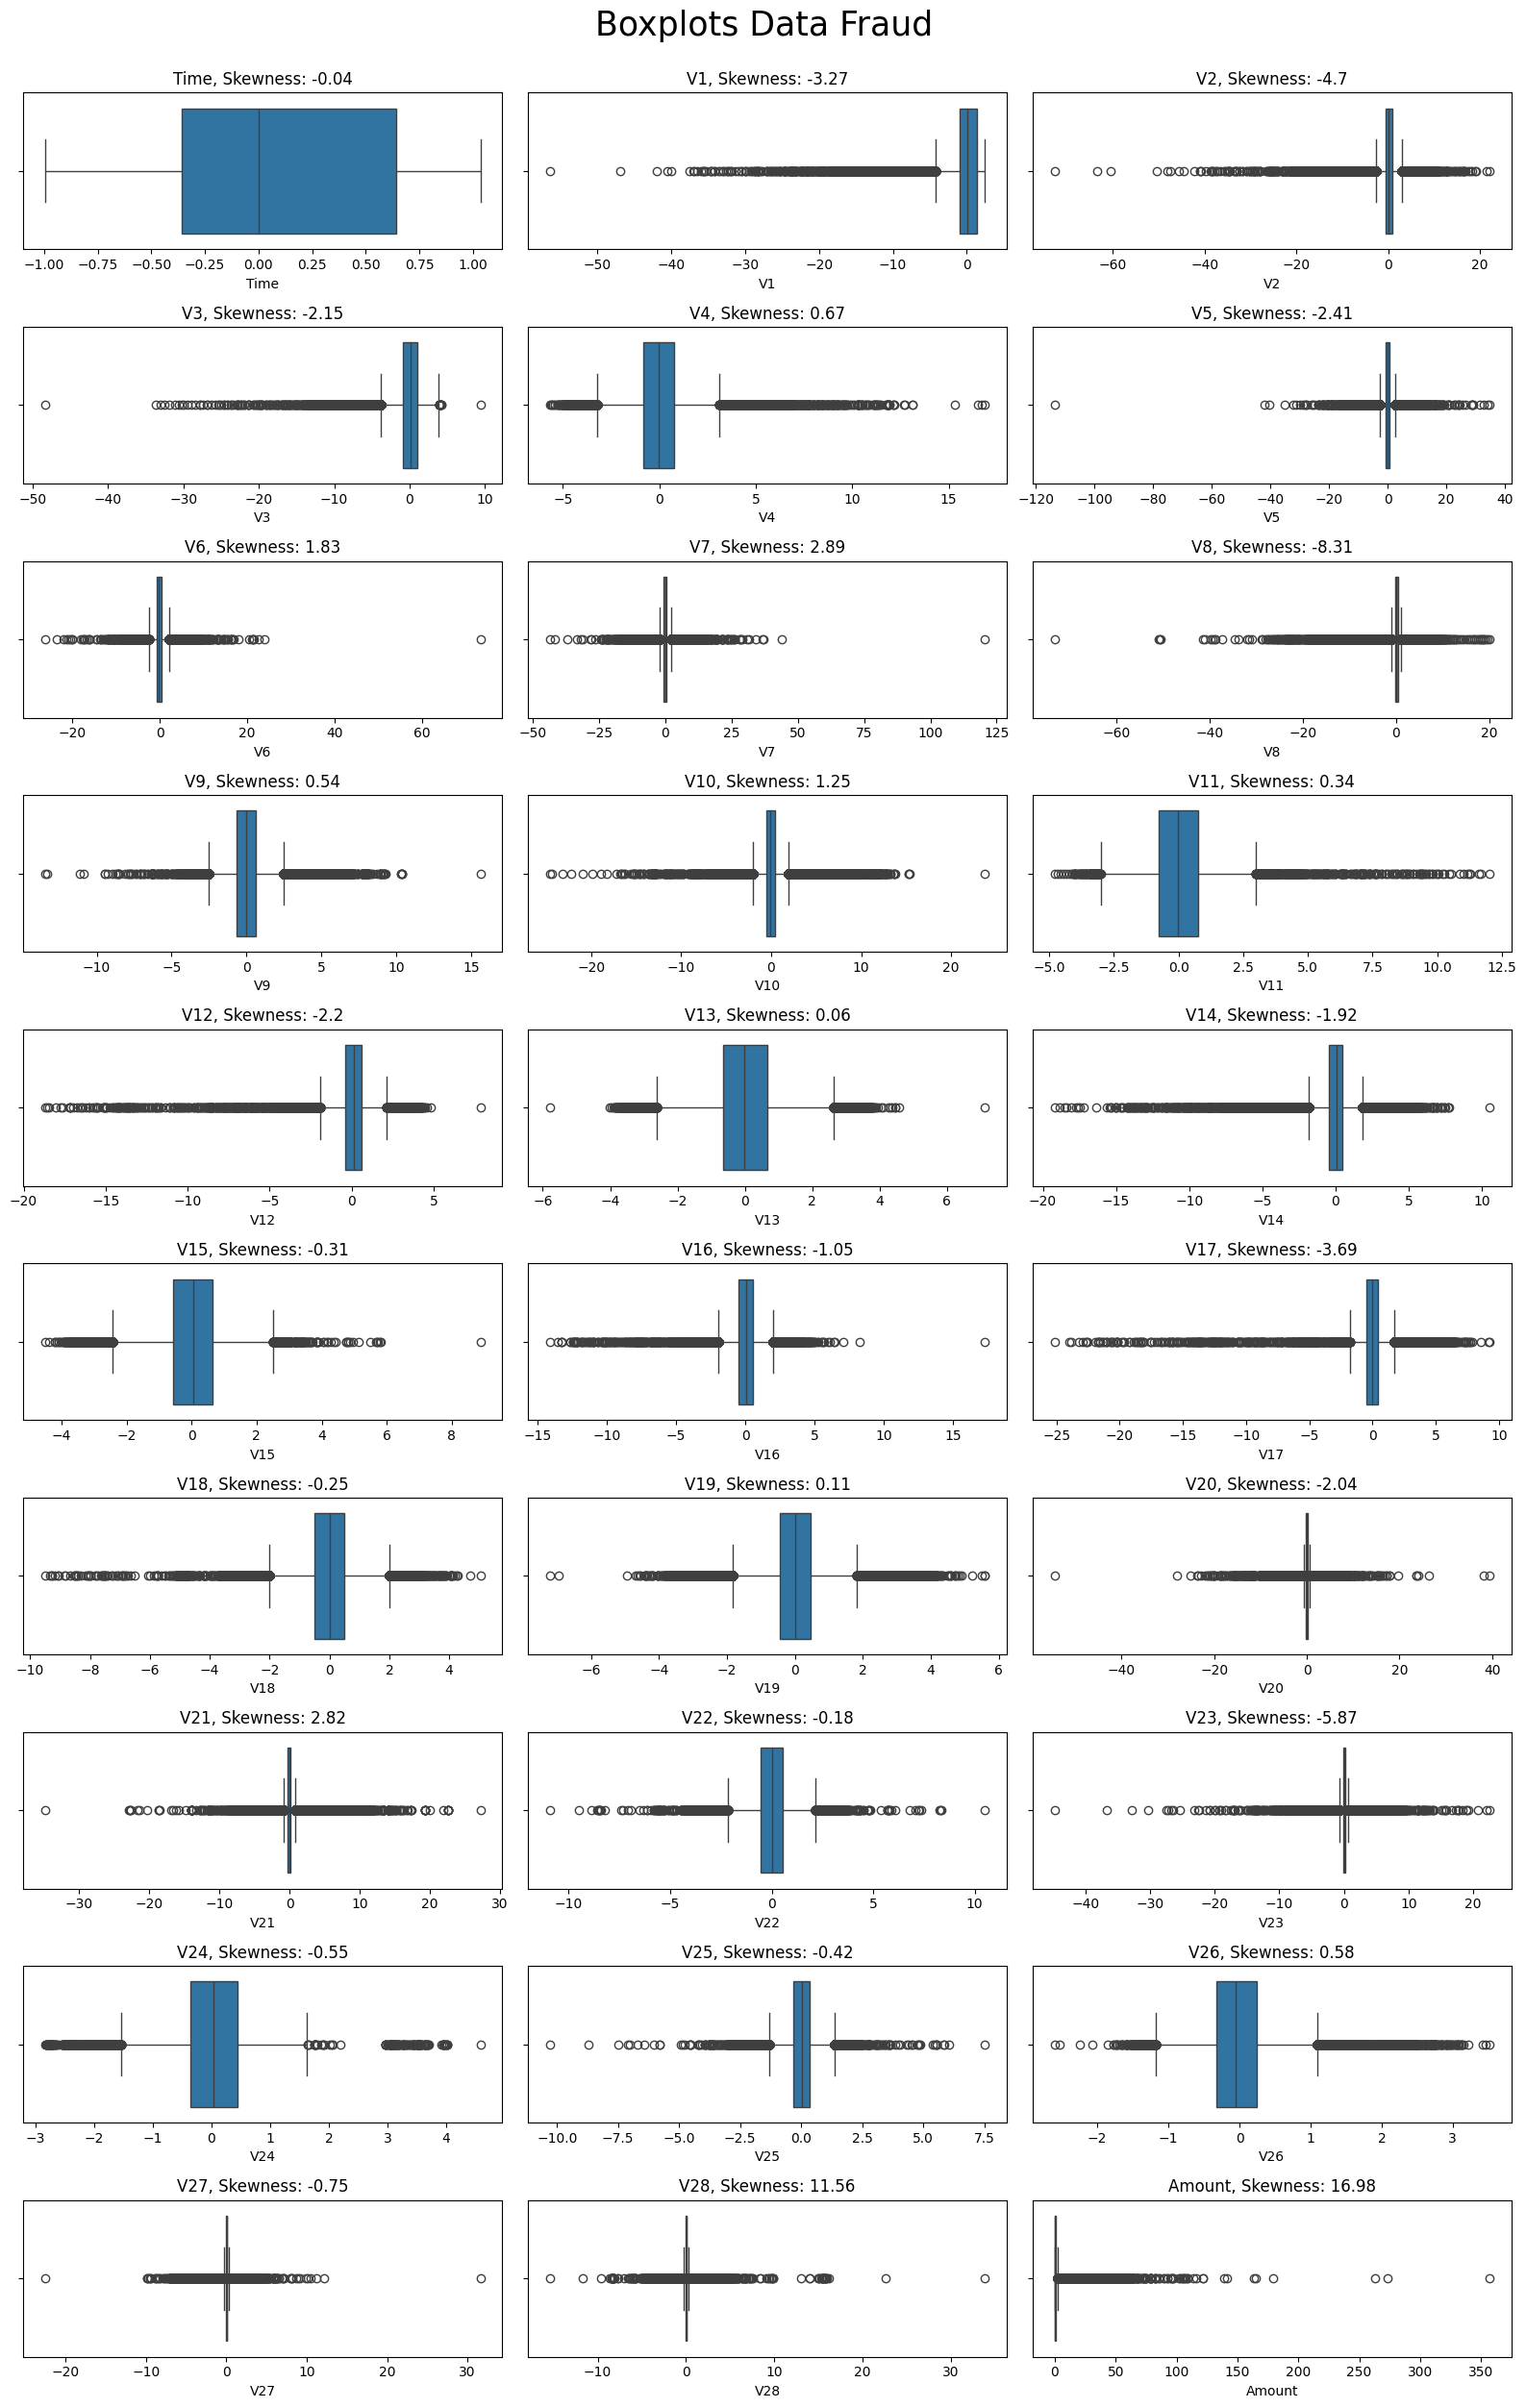

In [21]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', Skewness: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=dataFraud, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots Data Fraud')
plt.tight_layout()

Berdasarkan bloxpot di atas, setiap kolom numerik dalam dataset memiliki jumlah outliers yang sangat banyak. Mari kita investigasi lebih lanjut untuk jumlah outliers setiap kolom.

In [ ]:
numeric_columns = (list(dataFraud.loc[:, 'V1':'Amount']))

def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(dataFraud[nama_kolom], 25, interpolation = 'midpoint')

  Q3 = np.percentile(dataFraud[nama_kolom], 75, interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
    bound = np.where(dataFraud[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
    bound = np.where(dataFraud[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

outliers_dataset = set()
for i in numeric_columns:
  upper_outliers = cek_outlier(i, 'upper_bound')
  lower_outliers = cek_outlier(i, 'lower_bound')
  outliers_dataset.update(upper_outliers)
  outliers_dataset.update(lower_outliers)
  total_outliers = len(upper_outliers) + len(lower_outliers)
  print(f'Outliers Kolom {i}: {total_outliers}')
   

Outliers Kolom V1: 6948
Outliers Kolom V2: 13390
Outliers Kolom V3: 3306
Outliers Kolom V4: 11096
Outliers Kolom V5: 12221
Outliers Kolom V6: 22886
Outliers Kolom V7: 8839
Outliers Kolom V8: 23904
Outliers Kolom V9: 8199
Outliers Kolom V10: 9346
Outliers Kolom V11: 735
Outliers Kolom V12: 15282
Outliers Kolom V13: 3362
Outliers Kolom V14: 14060
Outliers Kolom V15: 2884
Outliers Kolom V16: 8180
Outliers Kolom V17: 7353
Outliers Kolom V18: 7469
Outliers Kolom V19: 10151
Outliers Kolom V20: 27553
Outliers Kolom V21: 14401
Outliers Kolom V22: 1298
Outliers Kolom V23: 18467
Outliers Kolom V24: 4758
Outliers Kolom V25: 5333
Outliers Kolom V26: 5665
Outliers Kolom V27: 38799
Outliers Kolom V28: 30094
Outliers Kolom Amount: 31685


### Drop Outliers

In [ ]:
dataFraud_cleaned = dataFraud.drop(index=outliers_dataset)

print(f'Total baris sebelum dibersihkan: {dataFraud.shape[0]}')
print(f'Total baris sesudah dibersihkan: {dataFraud_cleaned.shape[0]}')

Total baris sebelum dibersihkan: 283726
Total baris sesudah dibersihkan: 145951


In [ ]:
dataFraud_cleaned.shape

(145951, 31)

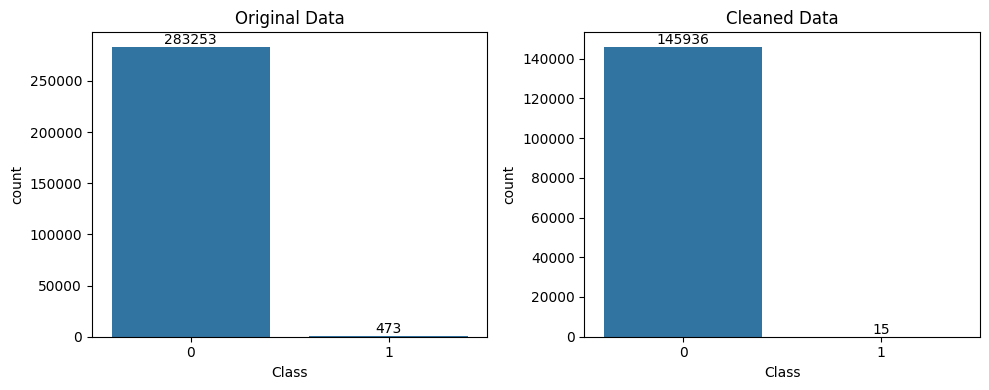

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x='Class', data=dataFraud, ax=axes[0])
axes[0].set_title('Original Data')
for container in axes[0].containers:
    axes[0].bar_label(container)

sns.countplot(x='Class', data=dataFraud_cleaned, ax=axes[1])
axes[1].set_title('Cleaned Data')
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, kita dapat melihat perbandingan antara data asli dengan data yang sudah dibersihkan. Akibat dari membersihkan outliers membuat data Fraud menjadi semakin menipis yaitu hanya tersisa 15 data. Maka dari itu, dalam kasus ini outliers tidak perlu dibersihkan agar tidak mengurangi sample data untuk class Fraud

### Data Split

In [ ]:
from sklearn.model_selection import train_test_split
x = dataFraud.drop('Class', axis=1)
y = dataFraud['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_s, y_train_s = oversample.fit_resample(x_train, y_train.ravel())

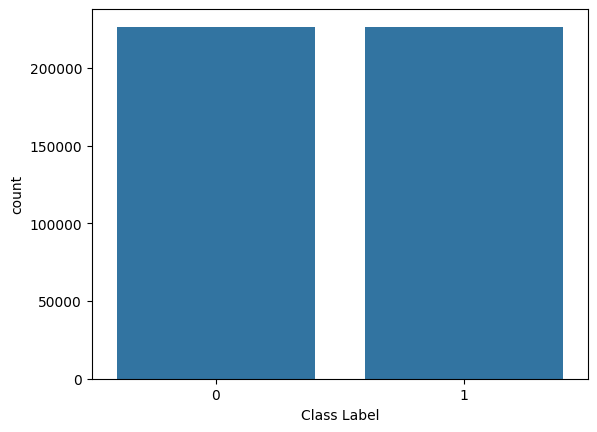

In [ ]:
dataFraud_s = pd.DataFrame({'Class Label': y_train_s})
sns.countplot(x='Class Label', data=dataFraud_s)
plt.show()

# Model Training

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score

In [32]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [33]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

### Logistic Regression

Evaluation of LogisticRegression After SMOTE

Accuracy: 0.97346
Precision: 0.05180
Recall: 0.94253
F1-score: 0.09820


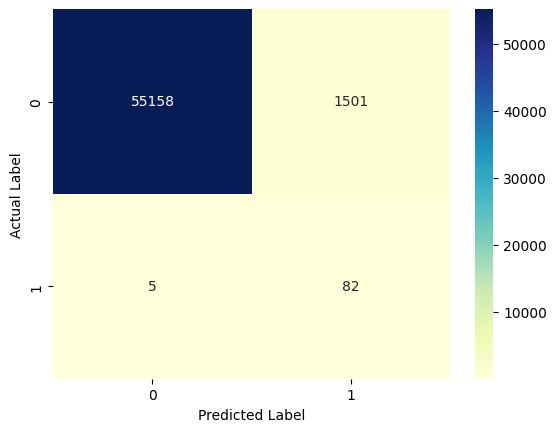

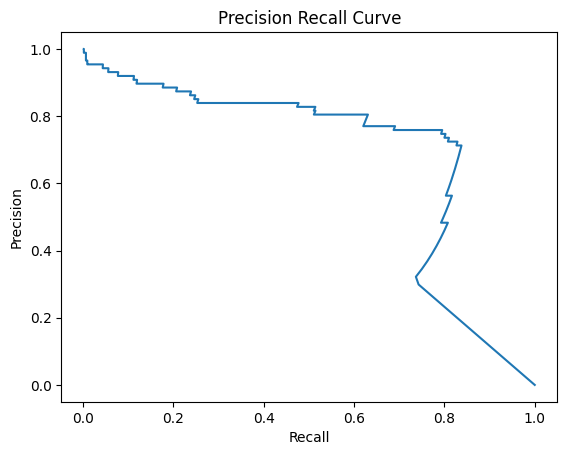

In [57]:
print('Evaluation of LogisticRegression After SMOTE')
result(LogisticRegression, x_train_s, y_train_s, x_test, y_test)

### Bagging Classifier

Evaluation of BaggingClassifier After SMOTE

Accuracy: 0.99901
Precision: 0.64486
Recall: 0.79310
F1-score: 0.71134


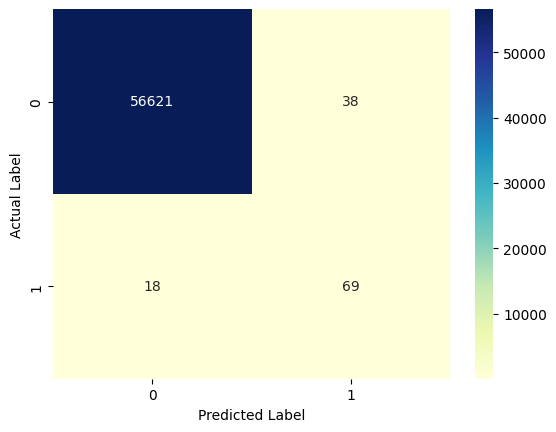

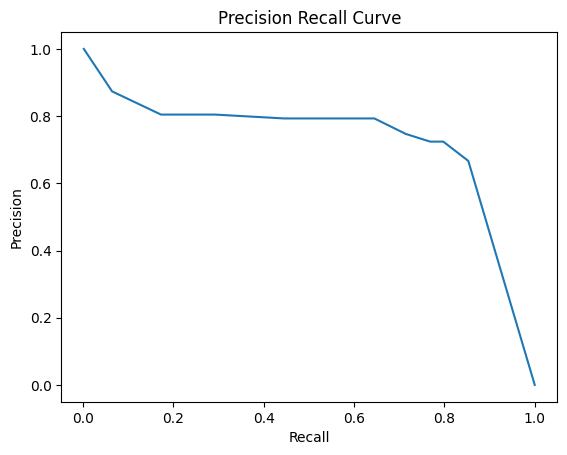

In [ ]:
print('Evaluation of BaggingClassifier After SMOTE')
result(BaggingClassifier, x_train_s, y_train_s, x_test, y_test)

### Random Forest Classifier

Evaluation of RandomForestClassifier After SMOTE

Accuracy: 0.99954
Precision: 0.88608
Recall: 0.80460
F1-score: 0.84337


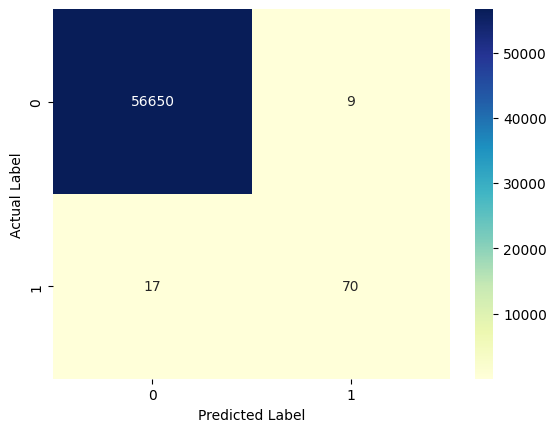

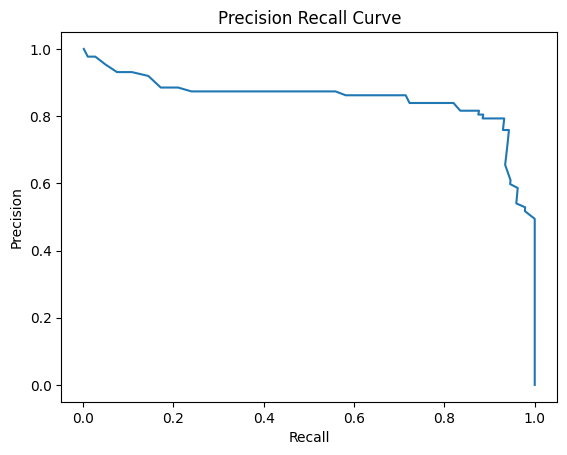

In [ ]:
print('Evaluation of RandomForestClassifier After SMOTE')
result(RandomForestClassifier, x_train_s, y_train_s, x_test, y_test)

### Decision Tree Classifier

Evaluation of DecisionTreeClassifier After SMOTE

Accuracy: 0.99748
Precision: 0.35417
Recall: 0.78161
F1-score: 0.48746


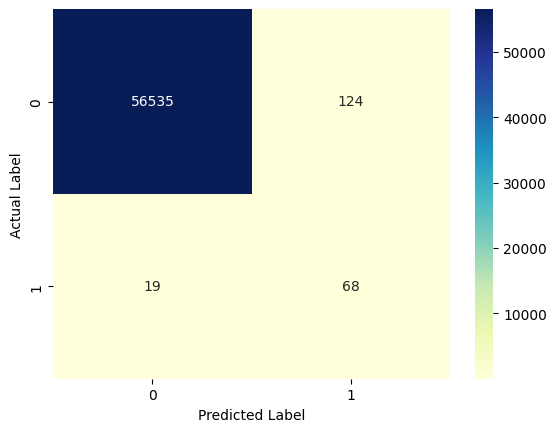

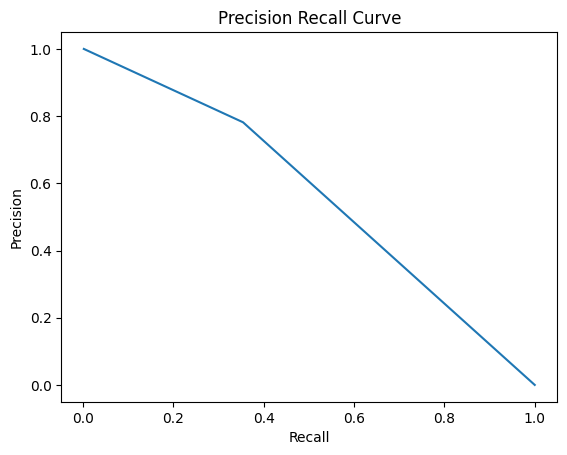

In [ ]:
print('Evaluation of DecisionTreeClassifier After SMOTE')
result(DecisionTreeClassifier, x_train_s, y_train_s, x_test, y_test)

### Ada Boost Classifier

Evaluation of AdaBoostClassifier After SMOTE

Accuracy: 0.97554
Precision: 0.05415
Recall: 0.90805
F1-score: 0.10220


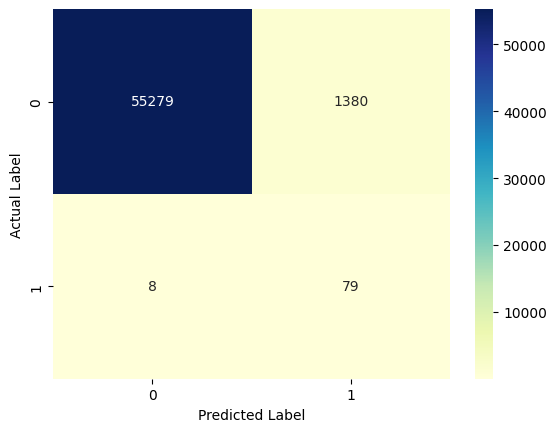

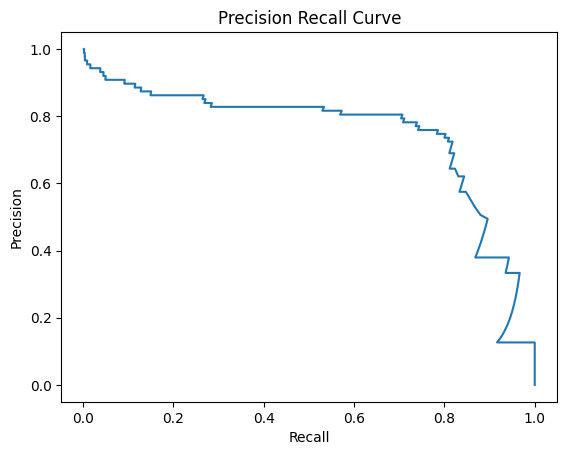

In [ ]:
print('Evaluation of AdaBoostClassifier After SMOTE')
result(AdaBoostClassifier, x_train_s, y_train_s, x_test, y_test)